In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [5]:
# CONSTANTS 
RANDOM_SEED = 42
SIMPLE_SAMPLE_SIZE = 50

In [54]:
# Load the file 
population_df = pd.read_excel('./ML374_S2_Height_Weight_Data_Concept.xlsx')
print("Preview of the dataset:")
population_df.head()

Preview of the dataset:


,Gender,Height_cm,Weight_kg
0,Male,152.5,58.2
1,Female,171.7,52.8
2,Female,149.7,64.8
3,Female,148.1,52.4
4,Male,177.2,74.6


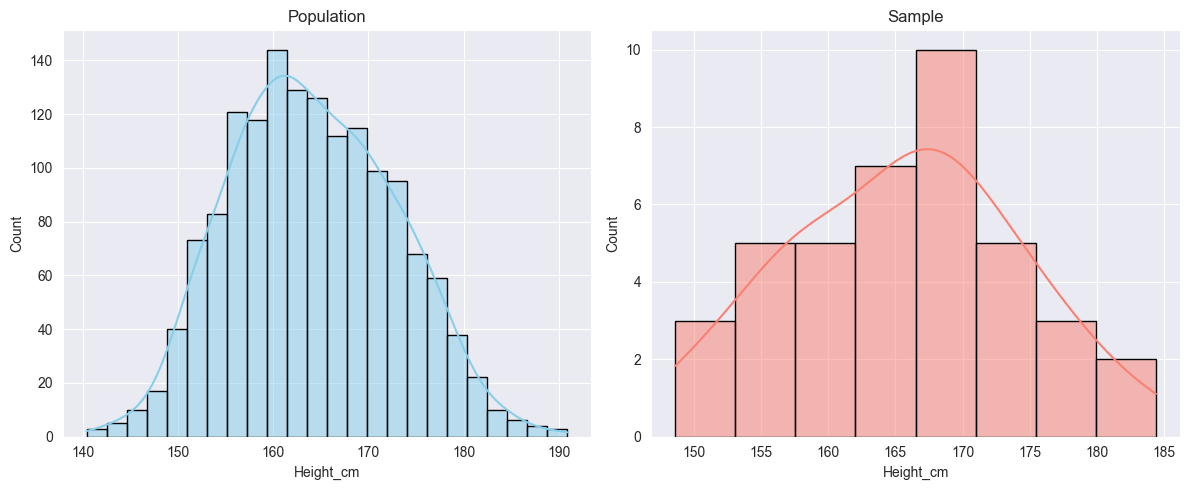

In [56]:
# PART 1 - Comare population with sample 
plt.figure(figsize=(12,5))

# Population histogram
plt.subplot(1, 2, 1)
sns.histplot(population_df['Height_cm'], bins=24, color='skyblue', kde=True, stat='count', edgecolor='k')
plt.title('Population')
plt.xlabel('Height_cm')
plt.ylabel('Count')

# Draw a random sample of 40 from the population
sample = population_df['Height_cm'].sample(n=40, random_state=42)

# Sample histogram
plt.subplot(1, 2, 2)
sns.histplot(sample, bins=8, color='salmon', kde=True, stat='count', edgecolor='k', alpha=0.5)
plt.title('Sample')
plt.xlabel('Height_cm')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


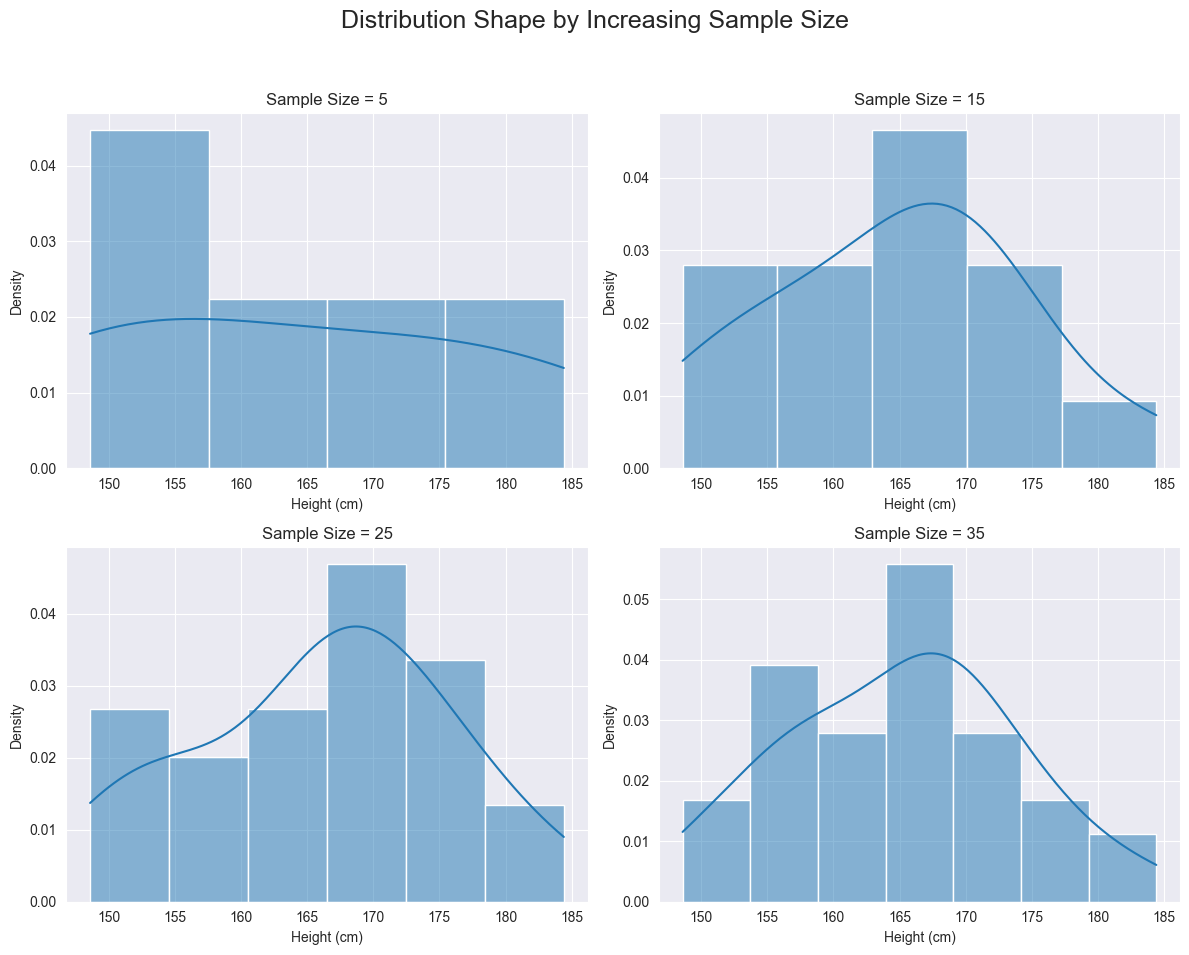

In [53]:
# PART 2 - Increasing sample size to see effect on distribution
sample_sizes = [5, 15, 25, 35]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
sns.set_style("darkgrid") # Match the style for this specific chart
fig.suptitle('Distribution Shape by Increasing Sample Size', fontsize=18)
for i, size in enumerate(sample_sizes):
    ax = axes[i]
    
    if len(population_df) < size:
        ax.set_title(f"Sample Size = {size} (Not enough data)")
        continue
    sample_df = population_df.sample(n=size, random_state=RANDOM_SEED)
    
    # This plot (histplot with KDE) already matches your screenshot
    sns.histplot(sample_df['Height_cm'], 
        ax=ax, 
        kde=True, 
        stat='density',
        common_norm=False)
    
    ax.set_title(f'Sample Size = {size}')
    ax.set_xlabel('Height (cm)')
    ax.set_ylabel('Density')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()